In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize

In [14]:
#dataset = pd.read_csv('./data/max.csv')
dataset = pd.read_csv('./data/checo.csv')

X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,1].values

In [15]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [16]:
#Ajustar la regresión lineal con el data set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [19]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [20]:
n = len(X)
n

20

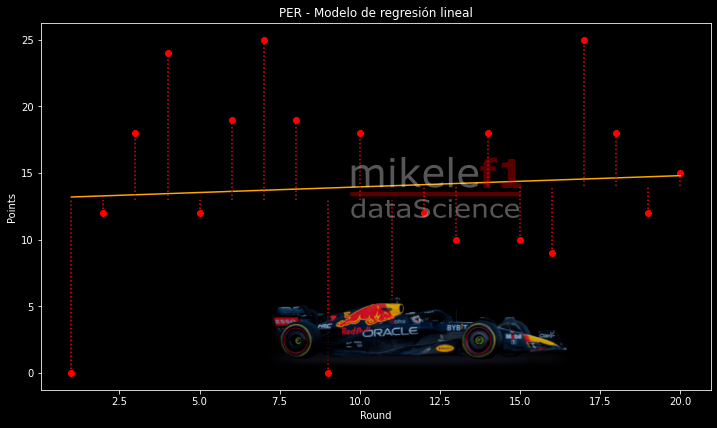

In [21]:
# Visualización 
# lineas de error  

# grafica
plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

tm = 'RedBullRacing'
#tm = 'Mercedes'
#tm = 'Ferrari'
car = image.imread('./images/'+tm+'.png')
res = resize(car, (97, 329))

plt.scatter(X, y, color = 'red' )
plt.plot(X, lin_reg.predict(X), color= "orange")

# lineas de error
for i in range(0,n,1):
    y0 = np.min([y[i],int(lin_reg.predict([[i]]))])
    y1 = np.max([y[i],int(lin_reg.predict([[i]]))])
    plt.vlines(X[i],y0,y1, color='red',
               linestyle = 'dotted')

plt.title("PER - Modelo de regresión lineal")
plt.xlabel('Round')
plt.ylabel('Points')

fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)
fig.figimage(res, xo=255, yo=50, origin='upper', alpha=.80)

nombrearchivo = 'per_rg_2022_rol20.png'
plt.savefig(nombrearchivo)

plt.show()


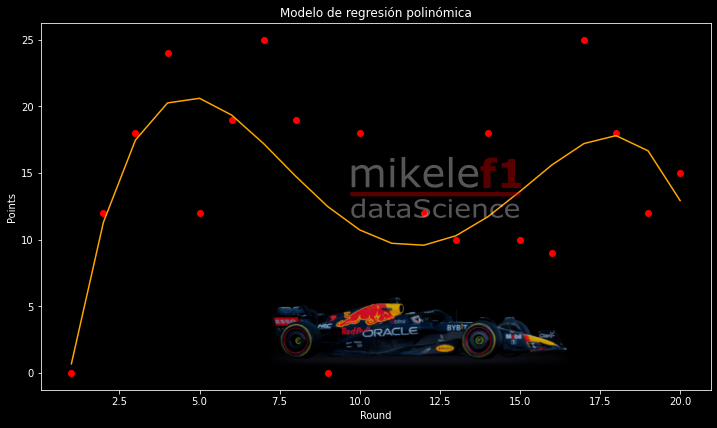

In [22]:

# Visualización
plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

tm = 'RedBullRacing'
plt.scatter(X, y, color = 'red' )
plt.plot(X, lin_reg_2.predict(X_poly), color= "orange")
plt.title("Modelo de regresión polinómica")
plt.xlabel('Round')
plt.ylabel('Points')
fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)
fig.figimage(res, xo=255, yo=50, origin='upper', alpha=.80)
plt.show()

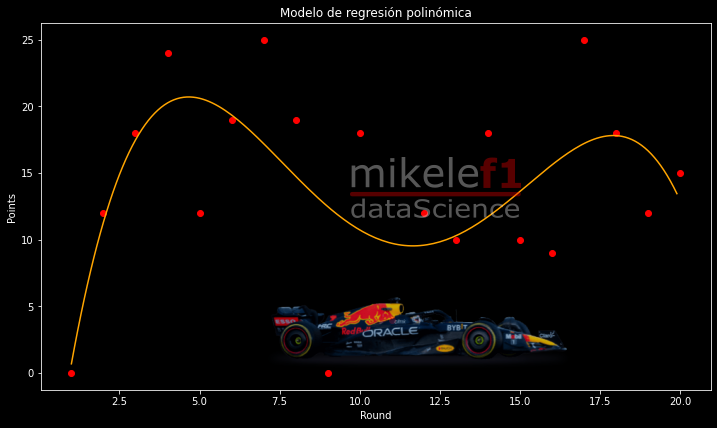

In [23]:
# Visualización
# grafica
plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

tm = 'RedBullRacing'
#tm = 'Mercedes'
#tm = 'Ferrari'
car = image.imread('./images/'+tm+'.png')
res = resize(car, (97, 329))


X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red' )
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color= "orange")



plt.title("Modelo de regresión polinómica")
plt.xlabel('Round')
plt.ylabel('Points')

fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)
fig.figimage(res, xo=255, yo=50, origin='upper', alpha=.80)

nombrearchivo = 'max_rp_2022_ro17.png'
plt.savefig(nombrearchivo)

plt.show()

In [24]:
lin_reg.predict([[20]])


array([14.8])

In [25]:
lin_reg_2.predict(poly_reg.fit_transform([[20]]))

array([12.93478261])